In [14]:
import matplotlib.pyplot as plt
from ezephys import pltools
import pickle

In [15]:
# analysis for dataset1
dataset1_file = './datasets/dataset1.pickle'
with open(dataset1_file, "rb") as file:
    dataset1 = pickle.load(file)

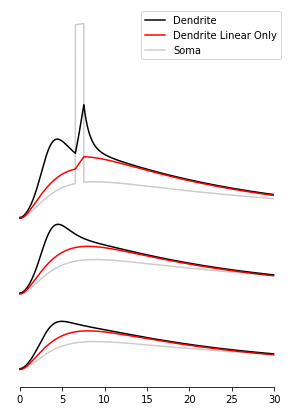

In [30]:
plt.figure(figsize=(5,7))
scale_y = 1
offset = scale_y * [0.5, 0.5, 0.5, 0.5, 0.5, 1.0]
for i, trace in enumerate(dataset1):
    # Vs = plt.fill_between(t, 20 * i + V_membrane, 20 * i + V_membrane + V_na, color='r', linewidth=0)
    t_end = 3000
    Vs_lin = trace['Vs_lin'][:t_end] 
    Vs_nl = trace['Vs_nl'][:t_end] 

    Vd = trace['Vd'][:t_end] 
    Vs = Vs_lin + 0.7 * Vs_nl
    Vd_lin = trace['Vd_lin'][:t_end] 
    time = trace['time'][:t_end]

    Vd_plt = plt.plot(time, offset[i] * i + Vd, 'k-')[0]
    Vd_lin_plt = plt.plot(time, offset[i] * i + Vd_lin, 'k-',  c='r')[0]
    Vs_plt = plt.plot(time, offset[i] * i + Vs, 'k-', alpha=0.2)[0]

# pltools.add_scalebar(x_units='ms', y_units='mV', anchor=(0.5, 0.7), bar_space=0)
Vs_plt.set_label('Soma')
Vd_plt.set_label('Dendrite')
Vd_lin_plt.set_label('Dendrite Linear Only')
pltools.hide_border('trl', trim=True)
plt.legend()
plt.savefig('./figures/recurrent1a.png')

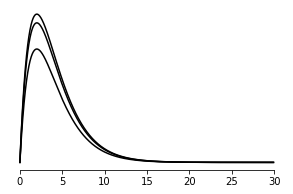

In [31]:
plt.figure(figsize=(5,3))
for i, trace in enumerate(dataset1):
    # Vs = plt.fill_between(t, 20 * i + V_membrane, 20 * i + V_membrane + V_na, color='r', linewidth=0)
    t_end = 3000
    input = trace['input'][:t_end] 
    time = trace['time'][:t_end]

    plt.plot(time, offset[i] + input, 'k-')
pltools.hide_border('trl', trim=True)
plt.savefig('./figures/recurrent1b.png')